In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
train['Year'] = [i[0] for i in train.Date.str.split('-').values]
test['Year'] = [i[0] for i in test.Date.str.split('-').values]

In [6]:
train['Month'] = [i[1] for i in train.Date.str.split('-').values]
test['Month'] = [i[1] for i in test.Date.str.split('-').values]

In [7]:
train['Day'] = [i[1] for i in train.Date.str.split('-').values]
test['Day'] = [i[1] for i in test.Date.str.split('-').values]

In [8]:
train['Year'] = train['Year'].map({'2018': 2, '2019': 1})
test['Year'] = test['Year'].map({'2018': 2, '2019': 1})

In [9]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [10]:
train['Year'] = train['Year'].astype('int64')
test['Year']=test['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
test['Month']=test['Month'].astype('int64')
train['Day'] = train['Day'].astype('int64')
test['Day']=test['Day'].astype('int64')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
 10  Year           188340 non-null  int64         
 11  Month          188340 non-null  int64         
 12  Day            188340 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 18.7+ MB


In [12]:
train = train.drop('#Order', axis=1)
train = train.drop('Date', axis=1)
test = test.drop('Date', axis=1)

In [1]:
train.head()

NameError: name 'train' is not defined

In [14]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

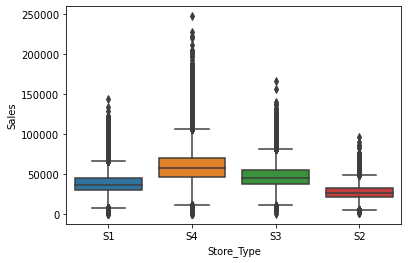

In [15]:
import seaborn as sns
sns.boxplot(x='Store_Type', y='Sales', data=train)

In [16]:
train.groupby(['Store_Type'])['Sales'].sum().sort_values(ascending=False)

Store_Type
S1    3.343866e+09
S4    2.752946e+09
S3    1.165658e+09
S2    7.955308e+08
Name: Sales, dtype: float64

In [17]:
train['Store_id'].value_counts()

128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64

In [18]:
train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

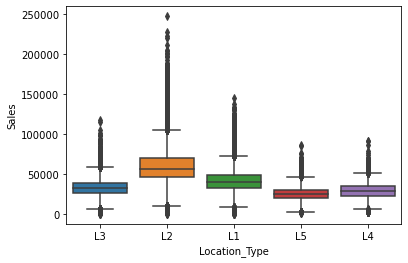

In [19]:
sns.boxplot(x='Location_Type', y='Sales', data=train)

In [20]:
store_location_type =train.groupby(['Store_Type'])['Location_Type'].count()
store_location_type

Store_Type
S1    88752
S2    28896
S3    24768
S4    45924
Name: Location_Type, dtype: int64

<AxesSubplot:ylabel='Location_Type'>

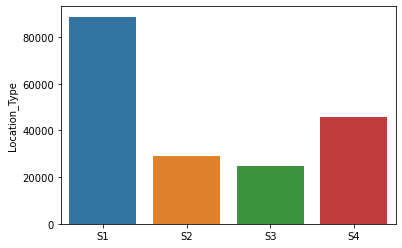

In [21]:
sns.barplot(x=['S1', 'S2', 'S3', 'S4'], y=store_location_type)

In [22]:
train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [23]:
train.groupby(['Store_Type', 'Location_Type'])['Region_Code'].count()

Store_Type  Location_Type
S1          L1               53148
            L2                7224
            L3               18576
            L4                6192
            L5                3612
S2          L1                4644
            L3                9288
            L4                4644
            L5               10320
S3          L1               13416
            L2                9288
            L3                2064
S4          L1               13932
            L2               31992
Name: Region_Code, dtype: int64

In [24]:
train.groupby(['Store_Type', 'Location_Type', 'Region_Code'])['Sales'].count()

Store_Type  Location_Type  Region_Code
S1          L1             R1              8772
                           R2             18060
                           R3             14964
                           R4             11352
            L2             R1               516
                           R2              3096
                           R3              2064
                           R4              1548
            L3             R1              6708
                           R2              6708
                           R3              4644
                           R4               516
            L4             R1              3096
                           R2              1548
                           R3              1548
            L5             R1              2064
                           R2              1548
S2          L1             R1              1032
                           R2              1548
                           R3              1032
 

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

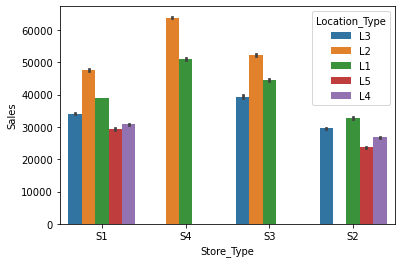

In [25]:
sns.barplot(x='Store_Type', y='Sales', hue='Location_Type', data=train)

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

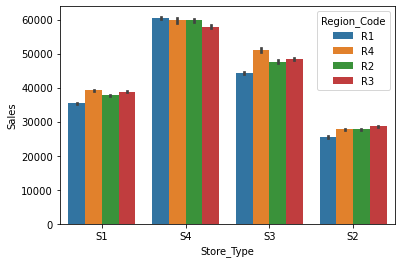

In [26]:
sns.barplot(x='Store_Type', y='Sales', hue='Region_Code', data=train)

In [27]:
train['Holiday'].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [28]:
train.groupby(['Holiday', 'Discount'])['Sales'].sum().sort_values(ascending=False)

Holiday  Discount
0        Yes         3.700618e+09
         No          3.477467e+09
1        Yes         4.654923e+08
         No          4.144234e+08
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

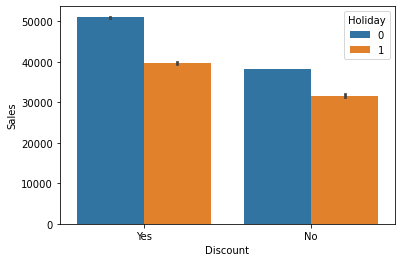

In [29]:
sns.barplot(x='Discount', y='Sales', hue='Holiday', data=train)

In [30]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,1,Yes,7011.84,2,1,1
1,T1000002,253,S4,L2,R1,1,Yes,51789.12,2,1,1
2,T1000003,252,S3,L2,R1,1,Yes,36868.20,2,1,1
3,T1000004,251,S2,L3,R1,1,Yes,19715.16,2,1,1
4,T1000005,250,S2,L3,R4,1,Yes,45614.52,2,1,1


In [31]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
0,T1188341,171,S4,L2,R3,0,No,1,6,6
1,T1188342,172,S1,L1,R1,0,No,1,6,6
2,T1188343,173,S4,L2,R1,0,No,1,6,6
3,T1188344,174,S1,L1,R4,0,No,1,6,6
4,T1188345,170,S1,L1,R2,0,No,1,6,6


In [32]:
train['Store_Type'] = train['Store_Type'].map({'S1':4, 'S2': 2, 'S3': 1, 'S4': 3 })
train['Location_Type'] = train['Location_Type'].map({'L1': 5, 'L2': 4, 'L3': 3, 'L5': 2, 'L4': 1 })
train['Region_Code'] = train['Region_Code'].map({'R1': 4, 'R2': 3, 'R3': 2, 'R4': 1})
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

In [33]:
test['Store_Type'] = test['Store_Type'].map({'S1':4, 'S2': 2, 'S3': 1, 'S4': 3 })
test['Location_Type'] = test['Location_Type'].map({'L1': 5, 'L2': 4, 'L3': 3, 'L5': 2, 'L4': 1 })
test['Region_Code'] = test['Region_Code'].map({'R1': 4, 'R2': 3, 'R3': 2, 'R4': 1})
test['Discount'] = test['Discount'].map({'Yes': 1, 'No': 0})

In [34]:
train = train.drop('ID', axis=1)
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day
0,1,4,3,4,1,1,7011.84,2,1,1
1,253,3,4,4,1,1,51789.12,2,1,1
2,252,1,4,4,1,1,36868.20,2,1,1
3,251,2,3,4,1,1,19715.16,2,1,1
4,250,2,3,1,1,1,45614.52,2,1,1


In [35]:
test = test.drop('ID', axis=1)
test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
0,171,3,4,2,0,0,1,6,6
1,172,4,5,4,0,0,1,6,6
2,173,3,4,4,0,0,1,6,6
3,174,4,5,1,0,0,1,6,6
4,170,4,5,3,0,0,1,6,6


In [36]:
from sklearn.model_selection import train_test_split
X = train.drop('Sales', axis=1)
y = train.Sales

In [37]:
# import datetime as dt
# X['Date']=X['Date'].map(dt.datetime.toordinal)
# test['Date'] = test['Date'].map(dt.datetime.toordinal)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store_id       188340 non-null  int64
 1   Store_Type     188340 non-null  int64
 2   Location_Type  188340 non-null  int64
 3   Region_Code    188340 non-null  int64
 4   Holiday        188340 non-null  int64
 5   Discount       188340 non-null  int64
 6   Year           188340 non-null  int64
 7   Month          188340 non-null  int64
 8   Day            188340 non-null  int64
dtypes: int64(9)
memory usage: 12.9 MB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_id       22265 non-null  int64
 1   Store_Type     22265 non-null  int64
 2   Location_Type  22265 non-null  int64
 3   Region_Code    22265 non-null  int64
 4   Holiday        22265 non-null  int64
 5   Discount       22265 non-null  int64
 6   Year           22265 non-null  int64
 7   Month          22265 non-null  int64
 8   Day            22265 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [40]:
y.head()

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
Name: Sales, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [42]:
X_train.shape, y_train.shape

((131838, 9), (131838,))

In [43]:

from sklearn.metrics import accuracy_score, mean_squared_error

In [250]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=200, max_leaf_nodes=100,min_samples_leaf=22,max_samples=0.5)


In [251]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=100, max_samples=0.5,
                      min_samples_leaf=22, random_state=200)

In [252]:
rmse = np.sqrt(mean_squared_error(y_train, rfr.predict(X_train)))
rmse

12543.806026603017

In [253]:
rmse = np.sqrt(mean_squared_error(y_test, rfr.predict(X_test)))
rmse

12571.907742348958

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131838 entries, 22964 to 38408
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store_id       131838 non-null  int64
 1   Store_Type     131838 non-null  int64
 2   Location_Type  131838 non-null  int64
 3   Region_Code    131838 non-null  int64
 4   Holiday        131838 non-null  int64
 5   Discount       131838 non-null  int64
 6   Year           131838 non-null  int64
 7   Month          131838 non-null  int64
 8   Day            131838 non-null  int64
dtypes: int64(9)
memory usage: 10.1 MB


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)

In [51]:
X_train_scaled = pd.DataFrame(scaled, columns=X_train.columns)
X_train_scaled

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
0,-0.920093,0.883314,0.861681,-1.750618,-0.388809,1.112208,0.643330,-0.734909,-0.734909
1,0.551451,0.883314,0.861681,-1.750618,-0.388809,1.112208,0.643330,0.737106,0.737106
2,1.329946,0.883314,-2.493355,1.118755,-0.388809,1.112208,-1.554413,-0.440506,-0.440506
3,-0.274512,0.883314,-0.815837,0.162297,-0.388809,-0.899112,-1.554413,-0.734909,-0.734909
4,-0.958068,-0.050570,0.022922,1.118755,-0.388809,-0.899112,0.643330,0.442703,0.442703
...,...,...,...,...,...,...,...,...,...
131833,1.016649,0.883314,0.861681,-0.794161,-0.388809,-0.899112,0.643330,0.737106,0.737106
131834,1.671724,-0.984453,-0.815837,0.162297,-0.388809,-0.899112,0.643330,0.148300,0.148300
131835,1.007155,-0.984453,-1.654596,0.162297,-0.388809,-0.899112,0.643330,0.737106,0.737106
131836,0.503982,0.883314,0.861681,-0.794161,-0.388809,1.112208,0.643330,0.148300,0.148300


In [52]:
import xgboost as xg
boost = xg.XGBRegressor(booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=5,
             n_estimators=110, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
boost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=110, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
rmse = np.sqrt(mean_squared_error(y_train, boost.predict(X_train)))
rmse

10940.597457656251

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, boost.predict(X_test)))
rmse

10991.818327330142

In [85]:
# from sklearn.svm import SVR

# svm_reg = SVR()
# svm_reg.fit(X_train, y_train)

SVR()

In [86]:
# rmse = np.sqrt(mean_squared_error(y_train, svm_reg.predict(X_train)))
# rmse

18697.455278710702

In [87]:
# rmse = np.sqrt(mean_squared_error(y_test, svm_reg.predict(X_test)))
# rmse

18788.340935343007

In [ ]:
# vet, iotx, amp, axs coins

In [78]:
# from sklearn.linear_model import Ridge

# ridge = Ridge(alpha=100, max_iter=10000, solver='sparse_cg', random_state=100)
# ridge.fit(X_train, y_train)

Ridge(alpha=100, max_iter=10000, random_state=100, solver='sparse_cg')

In [79]:
# rmse = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
# rmse

16175.712838834272

In [80]:
# rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
# rmse

16215.39567982385

In [254]:
final_test_pred = rfr.predict(test)

In [255]:
subm = pd.read_csv('SAMPLE.csv')
subm

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275
...,...,...
22260,T1210601,42275
22261,T1210602,42275
22262,T1210603,42275
22263,T1210604,42275


In [256]:
test_file = pd.read_csv('TEST_FINAL.csv')
id = test_file.ID
id


0        T1188341
1        T1188342
2        T1188343
3        T1188344
4        T1188345
           ...   
22260    T1210601
22261    T1210602
22262    T1210603
22263    T1210604
22264    T1210605
Name: ID, Length: 22265, dtype: object

In [257]:
my_sub = pd.DataFrame({'ID': id, 'Sales': final_test_pred})
my_sub

,ID,Sales
0,T1188341,51189.923812
1,T1188342,34949.863498
2,T1188343,58889.873575
3,T1188344,34949.863498
4,T1188345,34949.863498
...,...,...
22260,T1210601,20713.685233
22261,T1210602,58889.873575
22262,T1210603,46206.362247
22263,T1210604,34949.863498


In [258]:
my_sub.to_csv('submission11rfr.csv', index=False)